In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [ ]:
# GMP duomenų analizė
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/b8d1b280f55e45b3b8596d833584c8e5_0/about
# 
# Klausimai:
# Ar buvo mėnesių, kurie išssikirtų gaisringumu?
# Ar buvo mėnesių, kurie išssikirtų didelių gaisrų kiekiu? (2 ir daugiau autocisternos važiuoja) 

# kokios vyraujančios 5 GMP kvietimo priežastys? 
# Pateikite procentinį įvertinimą.
# ar yra mėnesių, išsiskiriančių trukdančių skambučių gausa?
# 
# pateikite top 5-kias priežastis, dėl kurių buvo kviesta policija.
# Pateikite procentinį įvertinimą.

# Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?

In [ ]:
# gmp[gmp['zemesnis_ivykio_tipas'].str.contains('Gaisras')]     kodas atrinktu visus irasus su zodziu 'Gaisras'

In [9]:
menesiai = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
kiekiai = {}  

for i in menesiai:
    if i in menesiai_csv:
        kiekiai[i] += 1  # Pridedame vieną prie esamo skaičiaus
    else:
        kiekiai[i] = 1  # Pradedame skaičiuoti nuo vieno


print(kiekiai)

KeyError: 1

In [21]:
import pandas as pd

df = pd.read_csv('GPM2.csv')
menesiai_csv = df.iloc[:, 5] 

pasikartojimai = menesiai_csv.value_counts()

kiekiai = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

for menesis in pasikartojimai.index:
    if menesis in kiekiai:
        kiekiai[menesis] = pasikartojimai[menesis]

print(kiekiai)
type(kiekiai)

{1: np.int64(206173), 2: np.int64(180635), 3: np.int64(201732), 4: np.int64(200133), 5: np.int64(207978), 6: np.int64(201204), 7: np.int64(102313), 8: np.int64(104466), 9: np.int64(72030), 10: np.int64(114554), 11: np.int64(158993), 12: np.int64(220714)}


dict

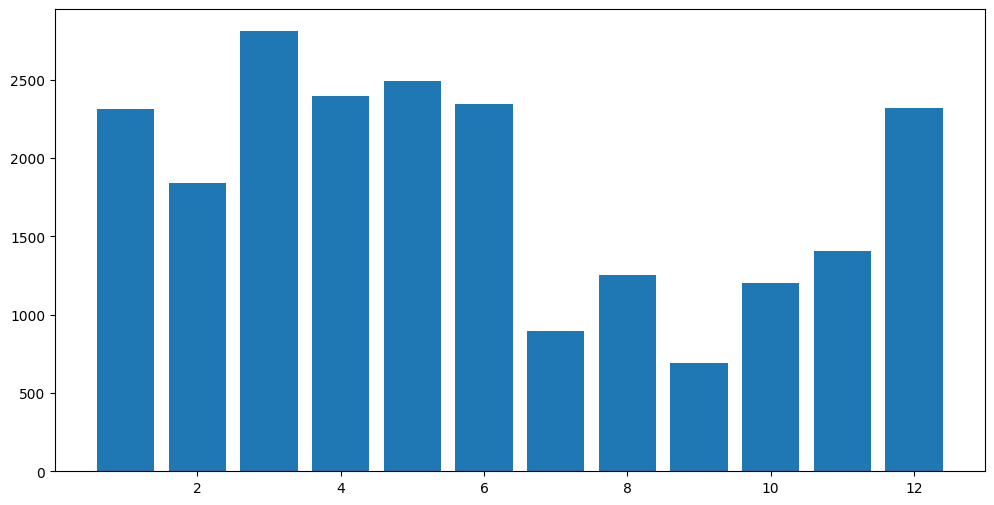

In [30]:
c


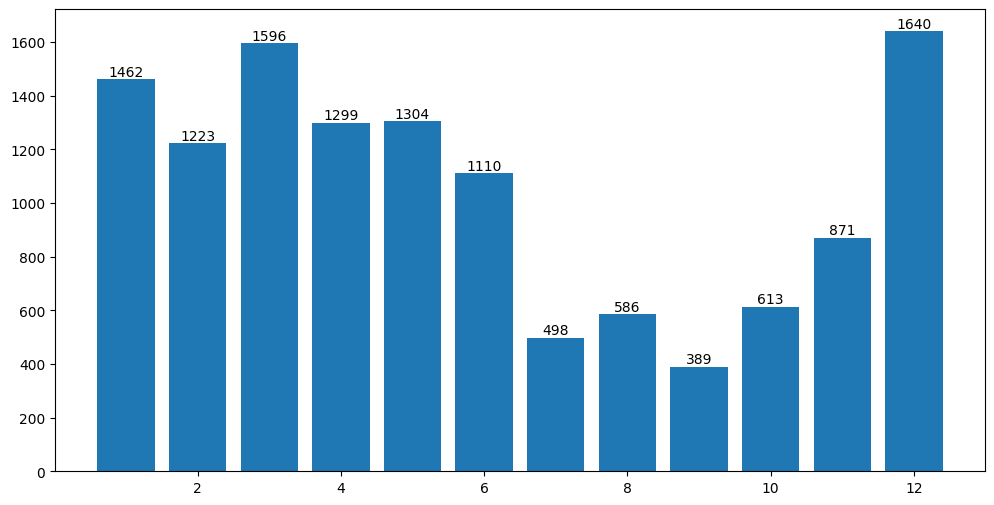

In [9]:
gmp = pd.read_csv('GPM2.csv')
gmp_gaisrai = gmp[gmp['zemesnis_ivykio_tipas'].str.contains('Gaisras 1|Gaisras 1AK|Gaisras 2|Gaisras 3|Gaisras 4|Gaisras 5', na=False)]

grouped = gmp_gaisrai.groupby('menuo').size()

fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(grouped.index, grouped.values)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.show()

In [11]:
gmp = pd.read_csv('GPM2.csv')
pagal_tipa = gmp[gmp['zemesnis_ivykio_tipas']].value_counts.index
print(pagal_tipa)

KeyError: "None of [Index([                          'GMP įvykis',\n                                 'GMP įvykis',\n                                 'GMP įvykis',\n                                 'GMP įvykis',\n                             'KET pažeidimas',\n                     'Pavojus eismo saugumui',\n        'Ekonominės ir verslo tvarkos veikos',\n                             'KET pažeidimas',\n                               'Konsultacija',\n                     'Turtinė veika anksčiau',\n       ...\n                                 'GMP įvykis',\n                                 'GMP įvykis',\n       'Įvairūs viešosios tvarkos pažeidimai',\n                     'Turtinė veika anksčiau',\n                                 'GMP įvykis',\n                                 'GMP įvykis',\n                                 'GMP įvykis',\n                                 'GMP įvykis',\n                        'Kompleksinis įvykis',\n                             'KET pažeidimas'],\n      dtype='object', length=1970925)] are in the [columns]"

zemesnis_ivykio_tipas
GMP įvykis                              744798
KET pažeidimas                          189390
Įvairūs viešosios tvarkos pažeidimai    162397
Turtinė veika anksčiau                   87722
Smurtas artimoje aplinkoje               83206
Name: count, dtype: int64


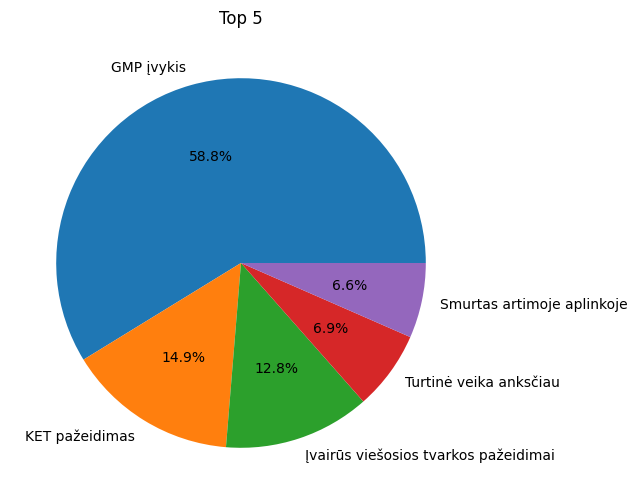

In [18]:
gmp = pd.read_csv('GPM2.csv')

pagal_tipa = gmp['zemesnis_ivykio_tipas'].value_counts().sort_values(ascending=False).head(5)

print(pagal_tipa)

plt.figure(figsize=(10, 6))
plt.pie(pagal_tipa, labels=pagal_tipa.index, autopct='%1.1f%%')
plt.title('Top 5')  
plt.show()




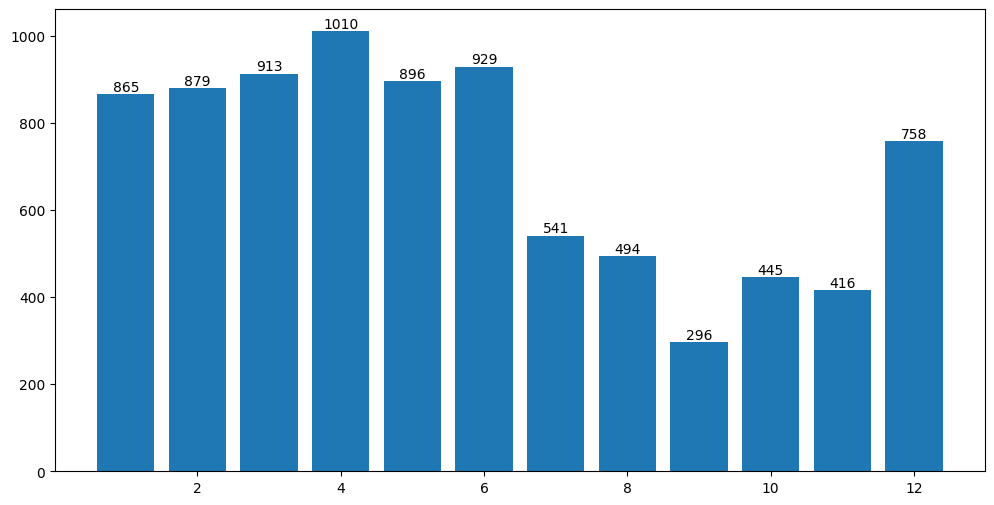

In [36]:
gmp = pd.read_csv('GPM2.csv')


trukdantys = gmp[gmp['zemesnis_ivykio_tipas'].str.contains('TRUKD', na=False)]
grouped2 = trukdantys.groupby('menuo').size()

fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(grouped2.index, grouped2.values)
ax.bar_label(bars)

plt.show()

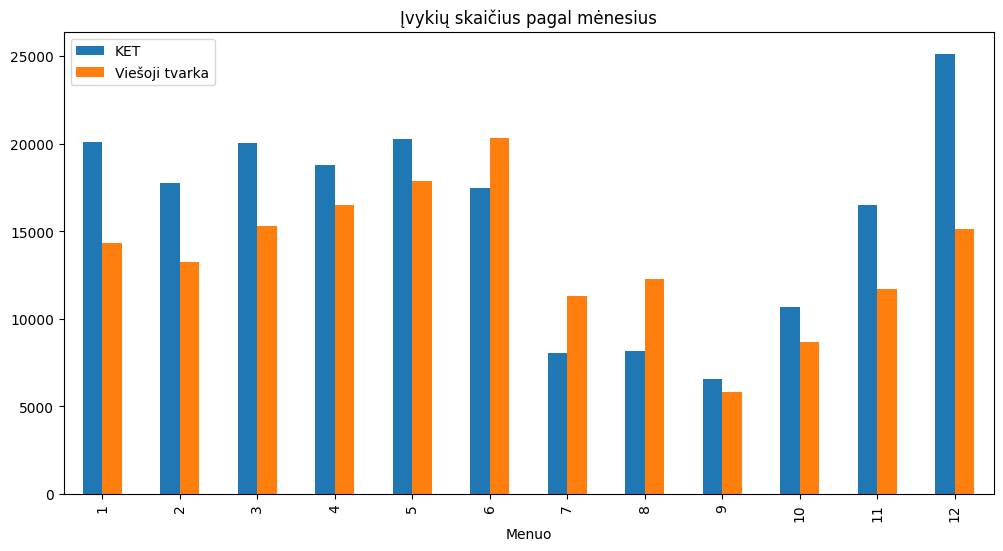

In [43]:
# Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?


gmp = pd.read_csv('GPM2.csv')

ketas = gmp[gmp['zemesnis_ivykio_tipas'].str.contains('KET', na=False)]
Viesoji_tvarka = gmp[gmp['zemesnis_ivykio_tipas'].str.contains('Įvairūs viešosios tvarkos pažeidimai', na=False)]

ketas_group = ketas.groupby('menuo').size()
viesa_group = Viesoji_tvarka.groupby('menuo').size()

df = pd.DataFrame({
    'KET': ketas_group,
    'Viešoji tvarka': viesa_group
})

df.fillna(0, inplace=True)



import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12,6))

df.plot(kind='bar', ax=ax)

ax.set_title('Įvykių skaičius pagal mėnesius')
ax.set_xlabel('Menuo')

ax.legend()
plt.show()




In [44]:
# #Suraskite 2013-2023 metų eismo įvykuose daugiausiai kartų užfiksuotą automobilių 
# # a) gamintoją b) modelį. Kiekvienais metais tas gamintojas/modelis 
# # gali būti skirtingas - pateikite bar/barh grafikus.
# Kiek iš užfiksuotų automobilių turėjo Kasko draudimą?

dataframes2 = []

for i in range(2013,2024):
    filename = f'ei_{i}_12_31.json'
    df = pd.read_json(f'C:\\Users\\User\\Desktop\\Dataframe_failai\\Eismo_ivykiai\\{filename}')
    dataframes2.append(df)


print(len(dataframes2))

11
